<a href="https://colab.research.google.com/github/francosuriano/ML2022/blob/main/Ej_3_3_suriano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#leemos el dataset
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [ ]:
# Separación en datos y target 

df_data = attributes_spotify
df_target = attributes_spotify.target

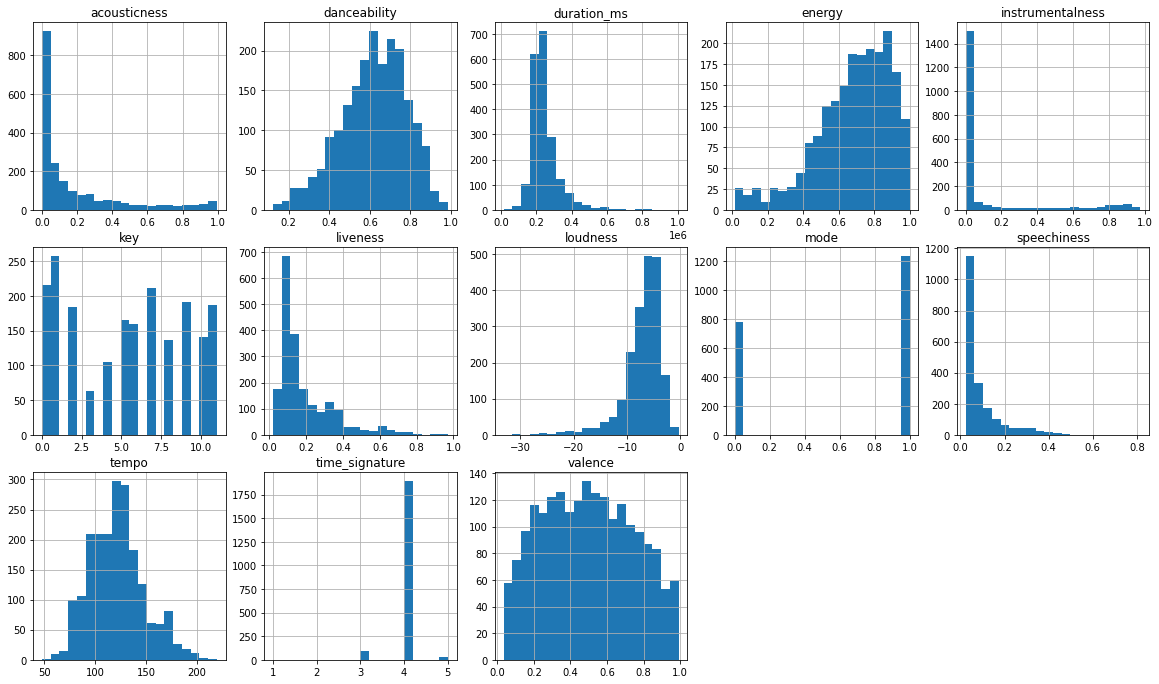

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,20))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax)
        ax.set_title(var_name)
        print()
    plt.show()


features = df_data.columns.values
target = features[16]
draw_histograms(df_data,features[1:14],5,5)

A continuación, elegimos los features mas representativos:
Existen varios features que se hallan muy sesgados y concentran todos sus datos en una sola frecuencia, por ejemplo: 'acousticness','instrumentaless','time_signature'. 

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

# elección de la cantidad de vecinos
k = 100

# elegimos los features a utilizar según la distribución que presenten sus datos (histogramas muy sesgados y con poca distribución uniforme se descartan)
# separacion de datos de training y testeo 

#X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(df_data[['danceability','duration_ms','key','energy','mode','tempo','valence']], df_target, test_size=0.2, random_state=20)

#'acousticness',	'danceability','duration_ms','energy',	'instrumentalness'	,'key',	'liveness',	'loudness',	'mode',	'speechiness',	'tempo',	'time_signature',	'valence'


# llamada al modelo de entrenamiento
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

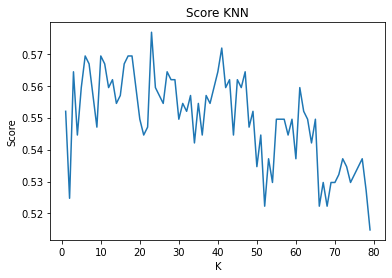

In [ ]:
# Medidas de validez

# Prueba para varios k
import numpy as np
from matplotlib import pyplot as plt

vecinos = np.arange(1, 80)
score = np.empty(len(vecinos))
 
for i, k in enumerate(vecinos):
    # se entrena en cada iteracion 
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # y se evalua el score sobre el conjunto de testeo
    score[i] = knn.score(X_test, y_test)

plt.title('Score KNN')
plt.plot(vecinos,score)
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

Observamos que los mejores resultados se obtienen tomando K entre 20 y 40 aproximadamente. 

Los resultados en exactitud son similares tomando más o menos features. Sin embargo, es importante quitar los que se hallen muy sesgados y los que sean valores únicos (como 'time_signature' por ejemplo). 

In [ ]:
from sklearn.metrics import classification_report

# Reporte automático de métricas
 
target_pred = y_test
target_exp = knn.predict(X_test)
print(classification_report(target_exp, target_pred))

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       190
           1       0.57      0.59      0.58       214

    accuracy                           0.55       404
   macro avg       0.55      0.55      0.55       404
weighted avg       0.55      0.55      0.55       404

